## Exercise 43: 
Identify the Target Variable and Related KPIs
from the Given Data for the Business Problem

Let's take the example of a subscription problem in the banking sector. We will use data that is from direct marketing
campaigns by a banking institution, where a customer either opens a term deposit or not after the campaign. The
subscription problem is characterized or defined contrastingly by every organization. For the most part, the customers who
will subscribe to a service (here, it is a term deposit) have higher conversion potential (that is, from lead to customer
conversion) to a service or product. Thus, in this problem, subscription metrics, that is, the outcome of historical data, is
considered as the target variable or KPI.
We will use descriptive analytics to explore trends in the data. We will start by identifying and defining the target variable
(here, subscribed or not subscribed) and the related KPIs.
This information is contained in attribute: y - has the client subscribed a term deposit? (binary: 'yes','no')

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import time
import re
import os
import matplotlib.pyplot as plt
sns.set(style="ticks")

In [2]:
df = pd.read_csv('bank/bank.csv', sep=';')

df.head(5)

age          job  marital  education default  balance housing loan  \
0   30   unemployed  married    primary      no     1787      no   no   
1   33     services  married  secondary      no     4789     yes  yes   
2   35   management   single   tertiary      no     1350     yes   no   
3   30   management  married   tertiary      no     1476     yes  yes   
4   59  blue-collar  married  secondary      no        0     yes   no   

    contact  day month  duration  campaign  pdays  previous poutcome   y  
0  cellular   19   oct        79         1     -1         0  unknown  no  
1  cellular   11   may       220         1    339         4  failure  no  
2  cellular   16   apr       185         1    330         1  failure  no  
3   unknown    3   jun       199         4     -1         0  unknown  no  
4   unknown    5   may       226         1     -1         0  unknown  no

In [3]:
df.describe()

age       balance          day     duration     campaign  \
count  4521.000000   4521.000000  4521.000000  4521.000000  4521.000000   
mean     41.170095   1422.657819    15.915284   263.961292     2.793630   
std      10.576211   3009.638142     8.247667   259.856633     3.109807   
min      19.000000  -3313.000000     1.000000     4.000000     1.000000   
25%      33.000000     69.000000     9.000000   104.000000     1.000000   
50%      39.000000    444.000000    16.000000   185.000000     2.000000   
75%      49.000000   1480.000000    21.000000   329.000000     3.000000   
max      87.000000  71188.000000    31.000000  3025.000000    50.000000   

             pdays     previous  
count  4521.000000  4521.000000  
mean     39.766645     0.542579  
std     100.121124     1.693562  
min      -1.000000     0.000000  
25%      -1.000000     0.000000  
50%      -1.000000     0.000000  
75%      -1.000000     0.000000  
max     871.000000    25.000000

When studying the target variable (subscribed or not subscribed—y), it is important to look at the distribution of it. The
type of target variable in this dataset is categorical, or of multiple classes. In this case, it's binary (Yes/No).
When the distribution is skewed to one class, the problem is known as an imbalance in the variable. We can study the
proportion of the target variable using a bar plot. This gives us an idea about how many of each class there is (in this
case, how many each of no and yes). The proportion of no is way higher than yes, which explains the imbalance in the
data.

4. Let's execute the following commands to plot a bar plot for the given data:

/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

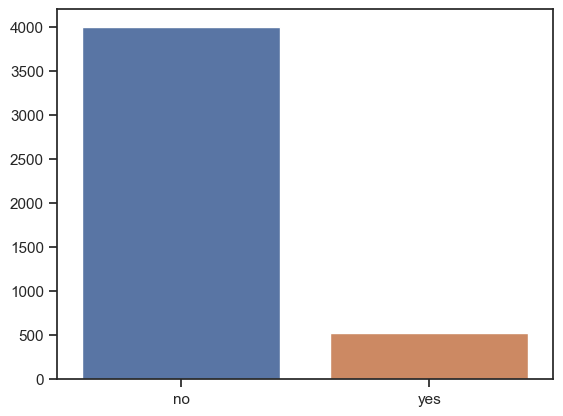

In [4]:
count_number_susbc = df["y"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

In [5]:
df["y"].value_counts()

no     4000
yes     521
Name: y, dtype: int64

Histograms/density plots are a great way to explore numerical/float variables, similar to bar plots. They can be
used for categorical data variables. Now, we will take each variable and look at their distribution trends.

In [6]:
# histogram for age (using matplotlib)
plt.hist(df['age'], color = 'grey', edgecolor = 'black',
bins = int(180/5))

(array([  7.,  16.,  44., 121., 197., 247., 423., 417., 180., 349., 289.,
        277., 256., 217., 227., 226., 192.,  86., 165., 164., 176., 118.,
         23.,  15.,  15.,   7.,   6.,  13.,  10.,   9.,   8.,   7.,   7.,
          4.,   1.,   2.]),
 array([19.        , 20.88888889, 22.77777778, 24.66666667, 26.55555556,
        28.44444444, 30.33333333, 32.22222222, 34.11111111, 36.        ,
        37.88888889, 39.77777778, 41.66666667, 43.55555556, 45.44444444,
        47.33333333, 49.22222222, 51.11111111, 53.        , 54.88888889,
        56.77777778, 58.66666667, 60.55555556, 62.44444444, 64.33333333,
        66.22222222, 68.11111111, 70.        , 71.88888889, 73.77777778,
        75.66666667, 77.55555556, 79.44444444, 81.33333333, 83.22222222,
        85.11111111, 87.        ]),
 <BarContainer object of 36 artists>)

/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='age'>

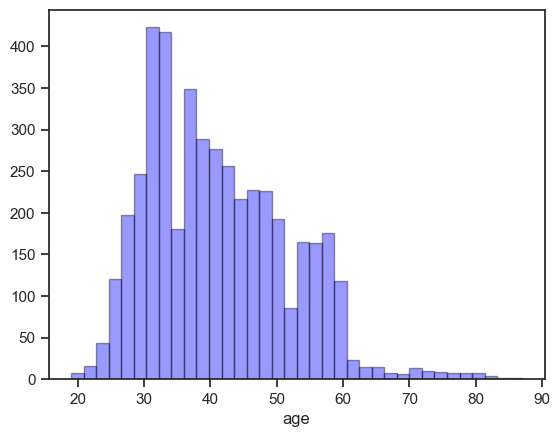

In [7]:
# histogram for age (using seaborn)
sns.distplot(df['age'], hist=True, kde=False,
bins=int(180/5), color = 'blue',
hist_kws={'edgecolor':'black'})

(array([7.000e+00, 2.848e+03, 1.020e+03, 3.340e+02, 1.290e+02, 7.200e+01,
        3.300e+01, 2.300e+01, 1.700e+01, 1.300e+01, 5.000e+00, 3.000e+00,
        6.000e+00, 1.000e+00, 7.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00]),
 array([-3313.        , -1243.52777778,   825.94444444,  2895.41666667,
         4964.88888889,  7034.36111111,  9103.83333333, 11173.30555556,
        13242.77777778, 15312.25      , 17381.72222222, 19451.19444444,
        21520.66666667, 23590.13888889, 25659.61111111, 27729.08333333,
        29798.55555556, 31868.02777778, 33937.5       , 36006.97222222,
        38076.44444444, 40145.91666667, 42215.38888889, 44284.86111111,
        46354.33333333, 48423.80555556, 50493.27777778, 52562.75      ,
        54632.22222222, 56701.69444444, 58771.1666

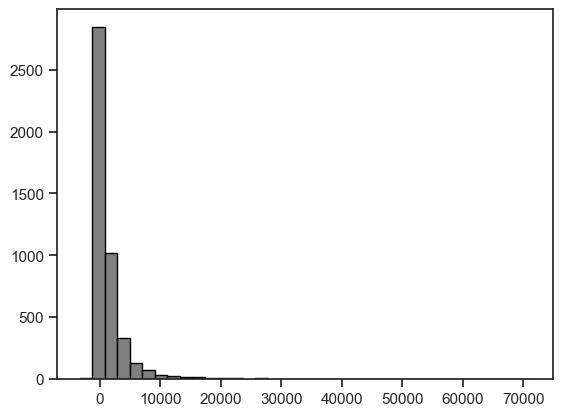

In [8]:
# histogram for balance (using matplotlib)
plt.hist(df['balance'], color = 'grey', edgecolor = 'black',
bins = int(180/5))

<AxesSubplot:xlabel='balance'>

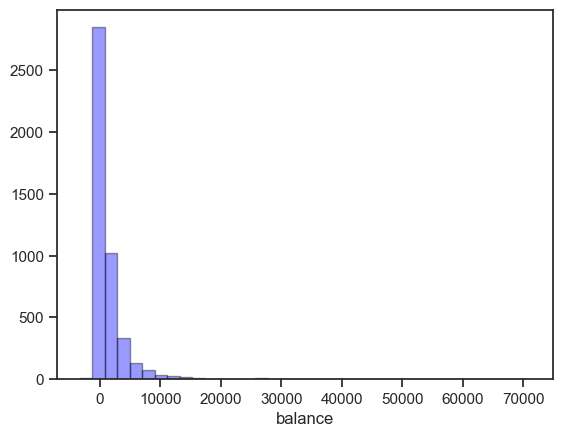

In [9]:
# histogram for balance (using seaborn)
sns.distplot(df['balance'], hist=True, kde=False,
bins=int(180/5), color = 'blue',
hist_kws={'edgecolor':'black'})

7. Now, using the following code, plot a bar plot for the education attribute in the dataset:

/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

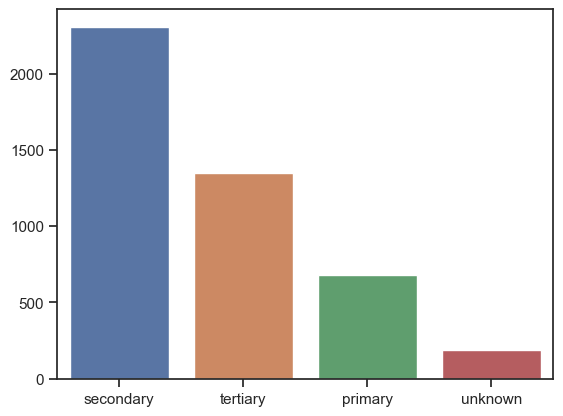

In [10]:
# barplot for the variable 'education'
count_number_susbc = df["education"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

In [11]:
df["education"].value_counts()

secondary    2306
tertiary     1350
primary       678
unknown       187
Name: education, dtype: int64

8. Use the following command to plot a bar plot for the month attribute of the dataset:

/home/mixer/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

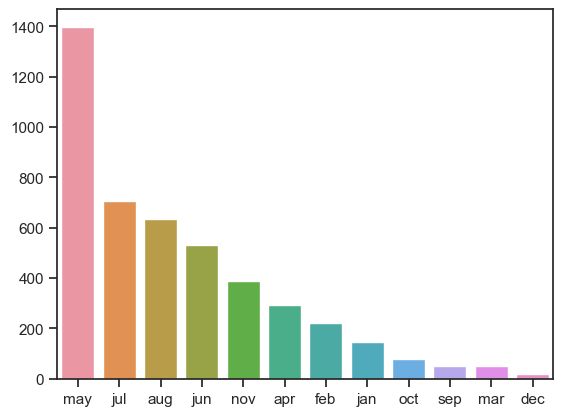

In [12]:
# barplot for the variable 'month'
count_number_susbc = df["month"].value_counts()
sns.barplot(count_number_susbc.index, count_number_susbc.values)

In [13]:
df["month"].value_counts()

may    1398
jul     706
aug     633
jun     531
nov     389
apr     293
feb     222
jan     148
oct      80
sep      52
mar      49
dec      20
Name: month, dtype: int64

9. The next task is to generate a distribution for each class of the target variable to compare the distributions. Plot a
histogram of the age attribute for the target variable (yes/no).

In [14]:
# generate separate list for each subscription type for age
x1 = list(df[df['y'] == 'yes']['age'])
x2 = list(df[df['y'] == 'no']['age'])

In [15]:
# assign colors for each subscription type
colors = ['#E69F00', '#56B4E9']
names = ['yes', 'no']

We will use density parameter.

If dedsity=True, the first element of the return tuple will be the counts normalized to form a probability density, i.e., the
area (or integral) under the histogram will sum to 1. This is achieved by dividing the count (in the bin) by the number of
observations (total) times the bin width and not dividing by the total number of observations. E.g.: count / (number of
observations * bin width)

Text(0.5, 1.0, 'Histogram for Yes and No Events w.r.t. IV')

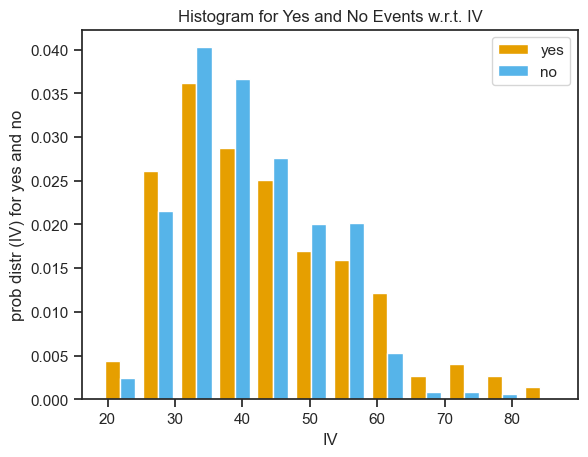

In [16]:
# plot the histogram
plt.hist([x1, x2], bins = int(180/15), density=True,
color = colors, label=names)
# plot formatting
plt.legend()
plt.xlabel('IV')
plt.ylabel('prob distr (IV) for yes and no')
plt.title('Histogram for Yes and No Events w.r.t. IV')

The above is the bar plot of the month attribute target variable.

10. Now, using the following command, plot a bar plot for the target variable grouped by month:

<AxesSubplot:xlabel='month'>

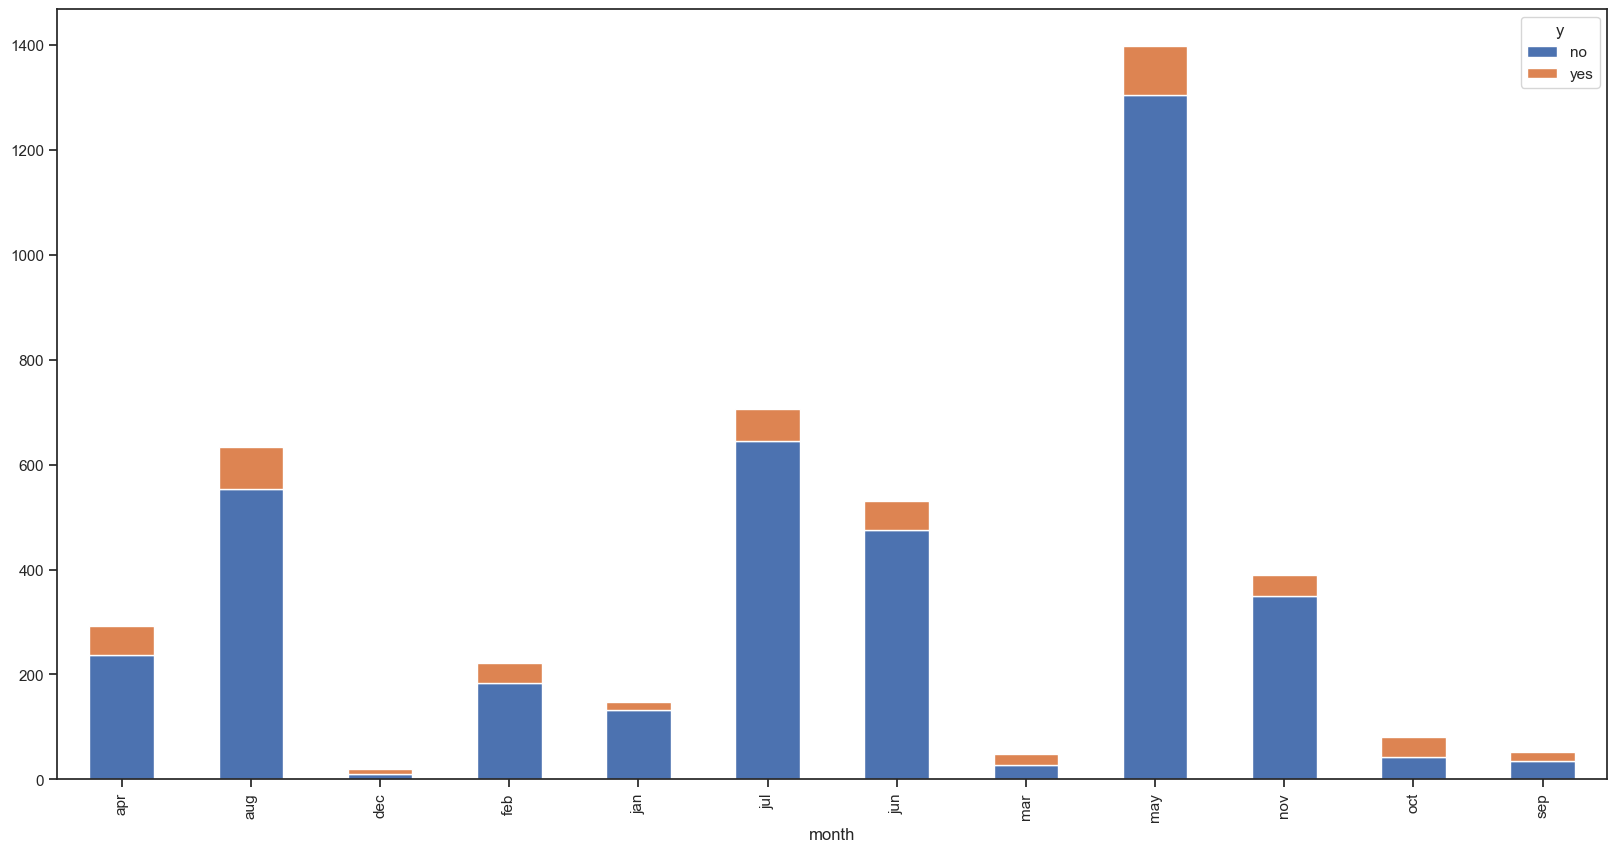

In [17]:
#df.groupby(["month", "y"]).size().unstack()

df.groupby(["month", "y"]).size().unstack().plot(kind='bar', stacked=True,figsize=(20,10))

In [18]:
# %pip install pandas_profiling

In [19]:
# %pip install Jinja2==3.0.3

Note: you may need to restart the kernel to use updated packages.


In [23]:
import ydata_profiling # This is instead of pandas_profiling

In [27]:
pandas_profiling.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]